In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Salary')

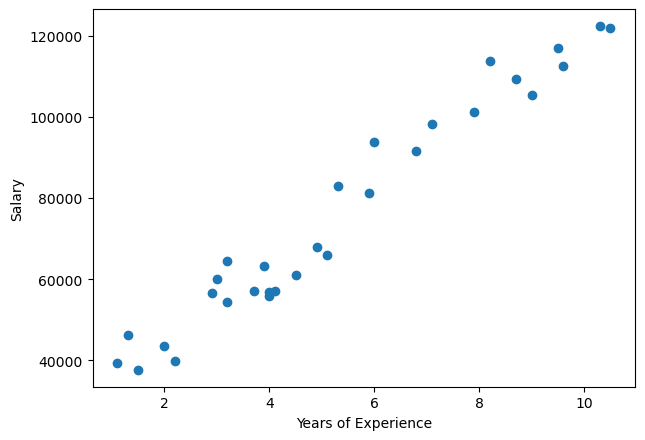

In [5]:
plt.figure(figsize=(7,5), dpi = 100)
plt.scatter(x= df['YearsExperience'], y = df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [6]:
corr = df.corr()

<AxesSubplot:>

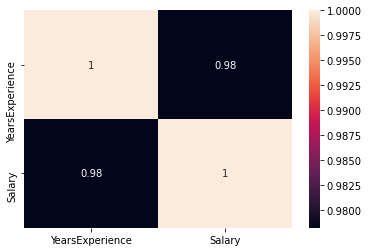

In [7]:
sns.heatmap(corr, annot=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

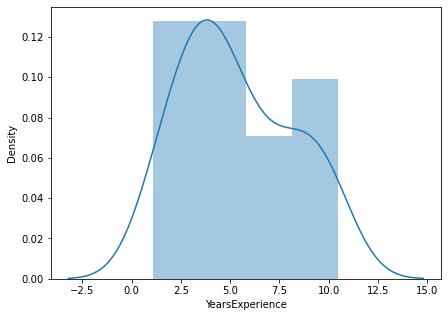

In [8]:
plt.figure(figsize=(7,5))
sns.distplot(df['YearsExperience'])

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
          4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
          7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])),
 (2.886343420068563, 5.313333333333333, 0.9786166317763666))

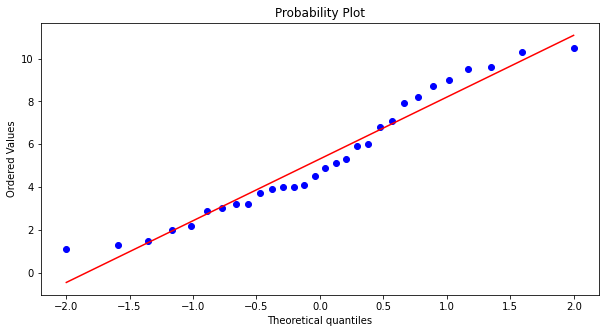

In [9]:
plt.figure(figsize=(10,5))
stats.probplot(df['YearsExperience'], dist='norm',plot=plt)

In [10]:
def plots(df, variable):
    plt.figure(figsize=(10,5), dpi = 150)
    plt.subplot(1,2,1)
    sns.distplot(df['YearsExperience'])
    
    plt.subplot(1,2,2 )
    stats.probplot(df[variable], dist='norm', plot=plt)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


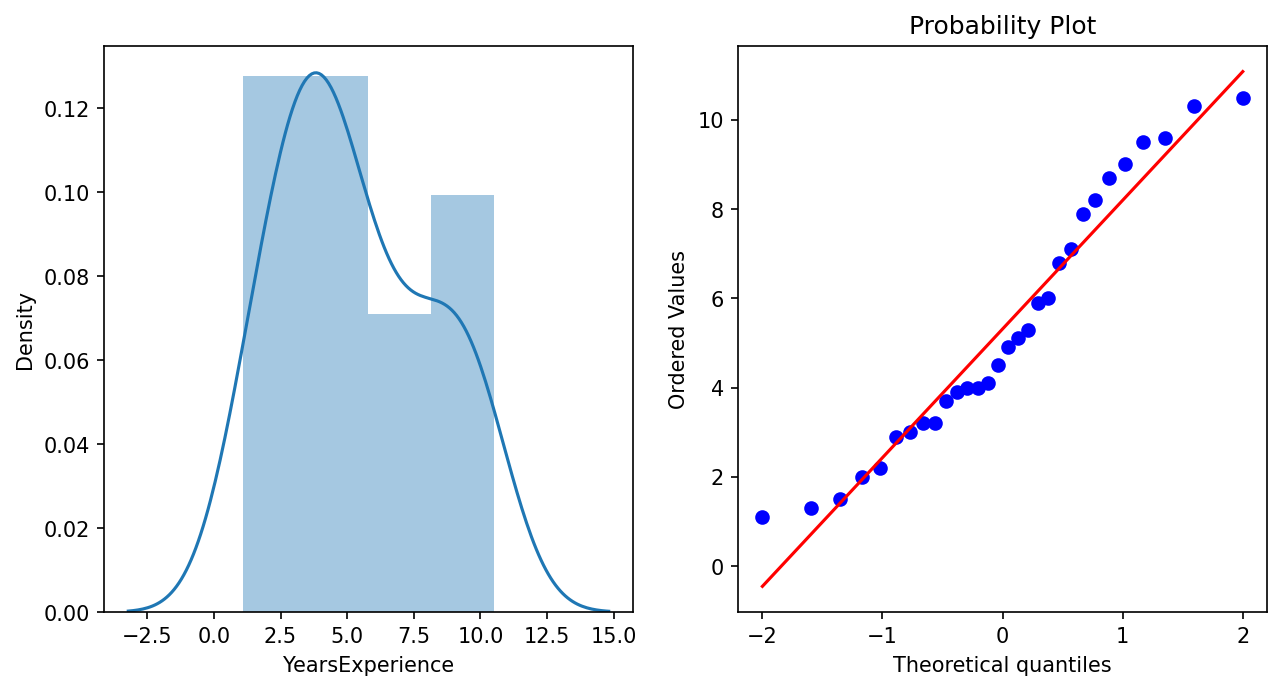

In [11]:
plots(df, 'YearsExperience')

- We can see that the independant variable is not normally distributed.
- We can perform some transformation methods to make this data normally distributed as Linear regression models performs well for normally distributed data.

In [12]:
x = df['YearsExperience']
y = df['Salary']

In [13]:
model = sm.OLS(y,x).fit()
predict = model.predict(x)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    2.56e-24
Time:                        14:33:15   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1. Log transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


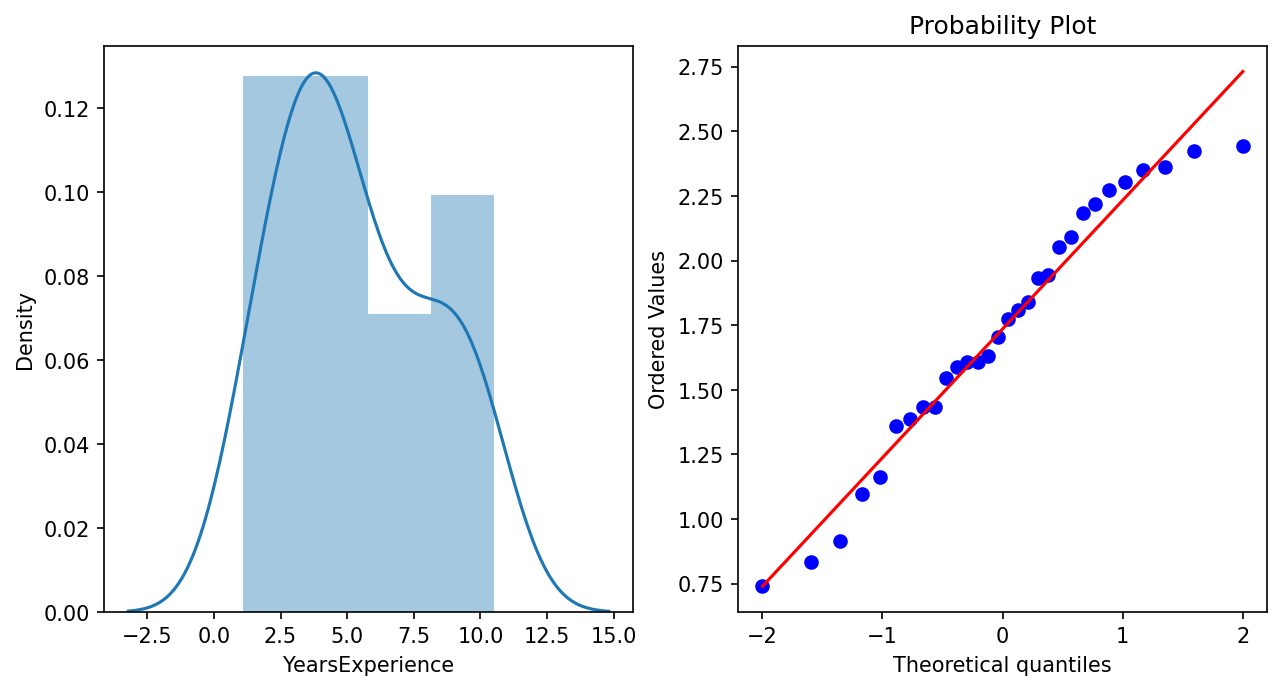

In [15]:
df['Log_Yrs'] = np.log(df['YearsExperience']+1) 
plots(df, 'Log_Yrs')

In [16]:
log_model = sm.OLS(y, df['Log_Yrs']).fit()
log_predict = log_model.predict(df['Log_Yrs'])

In [17]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1941.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    4.02e-28
Time:                        14:33:16   Log-Likelihood:                         -318.22
No. Observations:                  30   AIC:                                      638.4
Df Residuals:                      29   BIC:                                      639.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Log_Yrs     4.446e+04   1009.168     44.058      0.000    4.24e+04    4.65e+04
==============================================================================
Omnibus:                        6.216   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                1.923
Skew:                           0.021   Prob(JB):                        0.382
Kurtosis:                       1.760   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.Reciprocal Transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


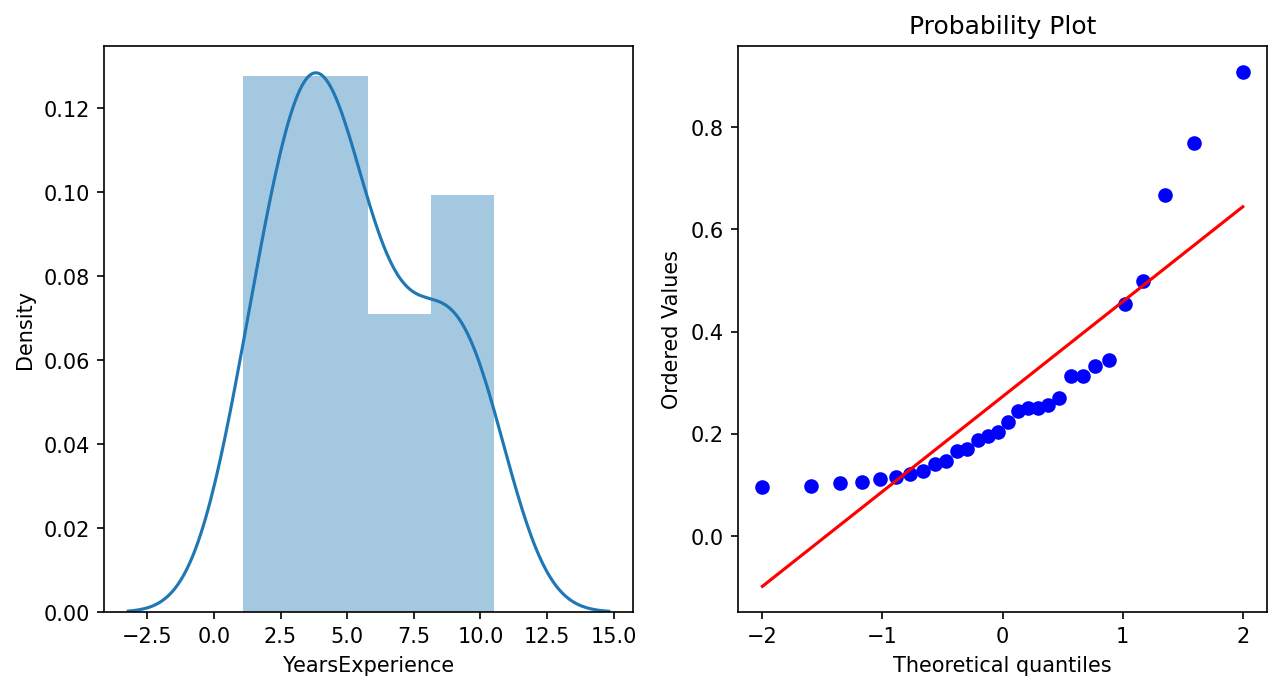

In [18]:
df['Rec_Yrs'] = 1/df['YearsExperience']
plots(df, 'Rec_Yrs')

In [19]:
reciprocal_model = sm.OLS(y, df['Rec_Yrs']).fit()
reciprocal_predict = reciprocal_model.predict(df['Rec_Yrs'])

In [20]:
reciprocal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.371
Model:                            OLS   Adj. R-squared (uncentered):              0.350
Method:                 Least Squares   F-statistic:                              17.12
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    0.000275
Time:                        14:33:16   Log-Likelihood:                         -374.54
No. Observations:                  30   AIC:                                      751.1
Df Residuals:                      29   BIC:                                      752.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rec_Yrs     1.454e+05   3.51e+04      4.138      0.000    7.35e+04    2.17e+05
==============================================================================
Omnibus:                        2.319   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.909
Skew:                          -0.605   Prob(JB):                        0.385
Kurtosis:                       2.750   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Square root transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


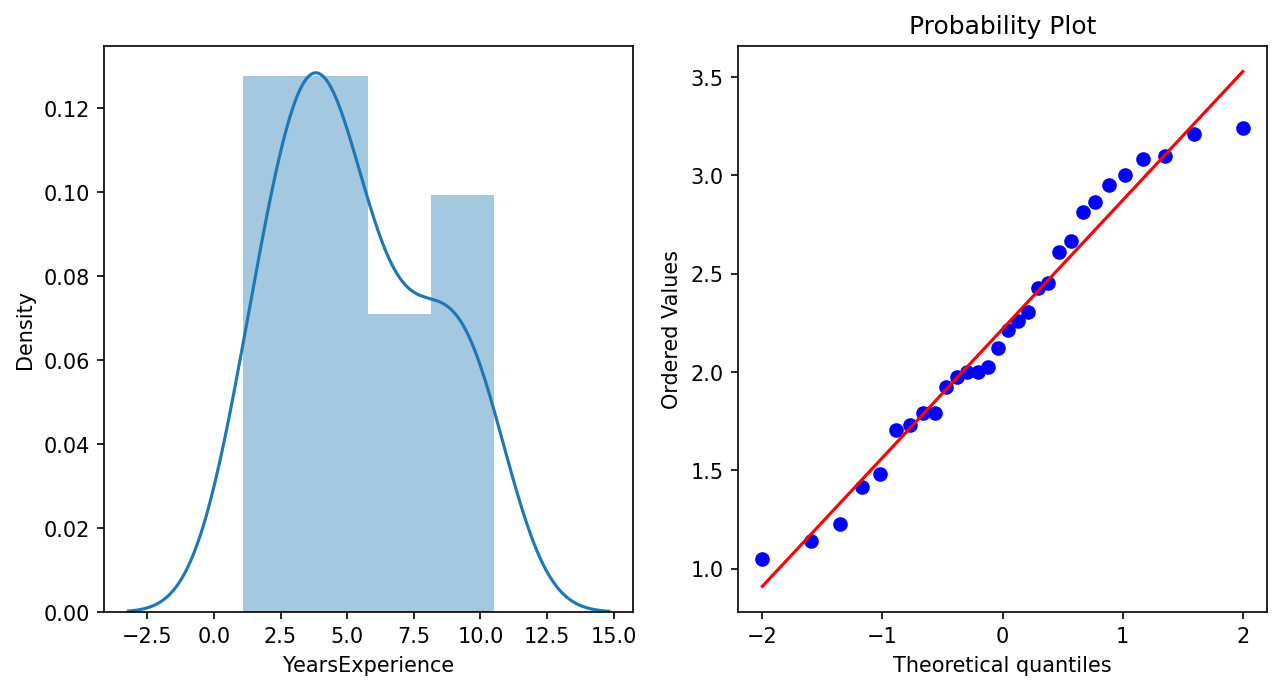

In [21]:
df['Sqrt_Yrs'] = np.sqrt(df['YearsExperience'])
plots(df, 'Sqrt_Yrs')

In [22]:
sqrt_model = sm.OLS(y, df['Sqrt_Yrs']).fit()
sqrt_predict = sqrt_model.predict(df['Sqrt_Yrs'])

In [23]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    3.62e-30
Time:                        14:33:17   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sqrt_Yrs     3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Exponential Transformation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


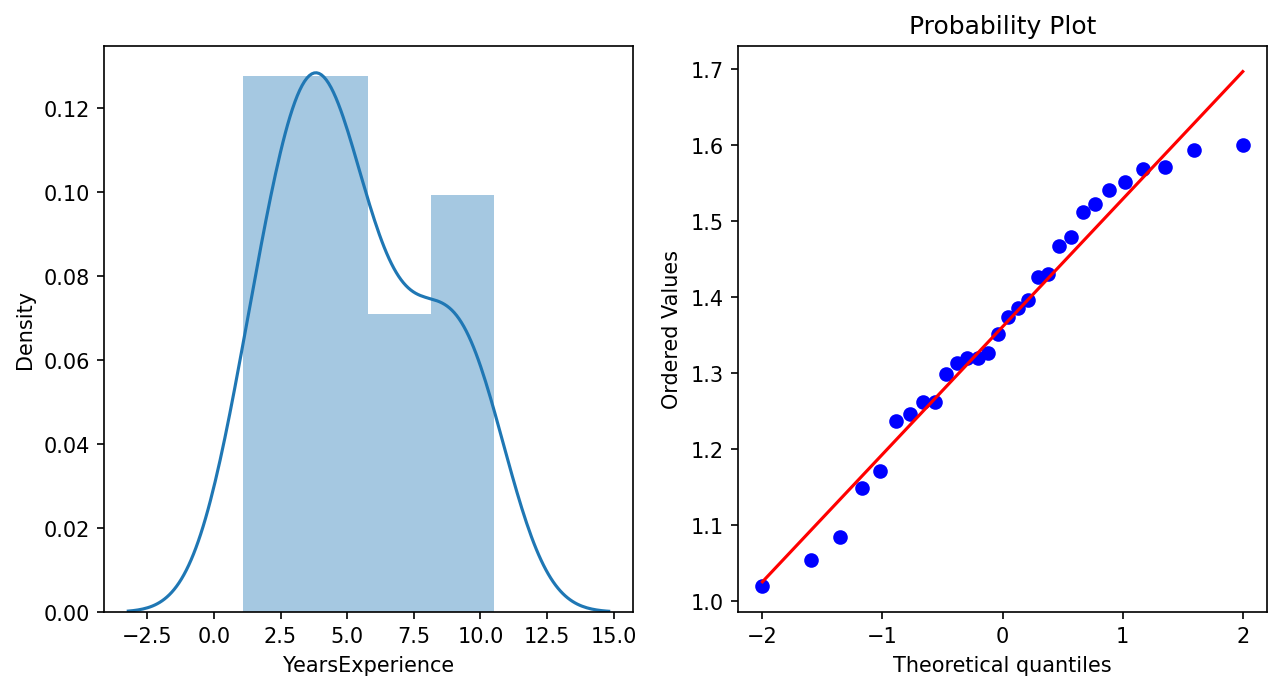

In [24]:
df['Exp_Yrs'] = df['YearsExperience']**(1/5)
plots(df, 'Exp_Yrs')

In [25]:
exponential_model = sm.OLS(y, df['Exp_Yrs']).fit()
exp_predict = exponential_model.predict(df['Exp_Yrs'])

In [26]:
exponential_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              517.2
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    4.91e-20
Time:                        14:33:17   Log-Likelihood:                         -337.47
No. Observations:                  30   AIC:                                      676.9
Df Residuals:                      29   BIC:                                      678.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Exp_Yrs     5.725e+04   2517.225     22.743      0.000    5.21e+04    6.24e+04
==============================================================================
Omnibus:                        8.689   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.156
Skew:                           0.469   Prob(JB):                        0.206
Kurtosis:                       1.718   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Boxcox Transformation

Optimal lambda:  0.35663414339671434


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


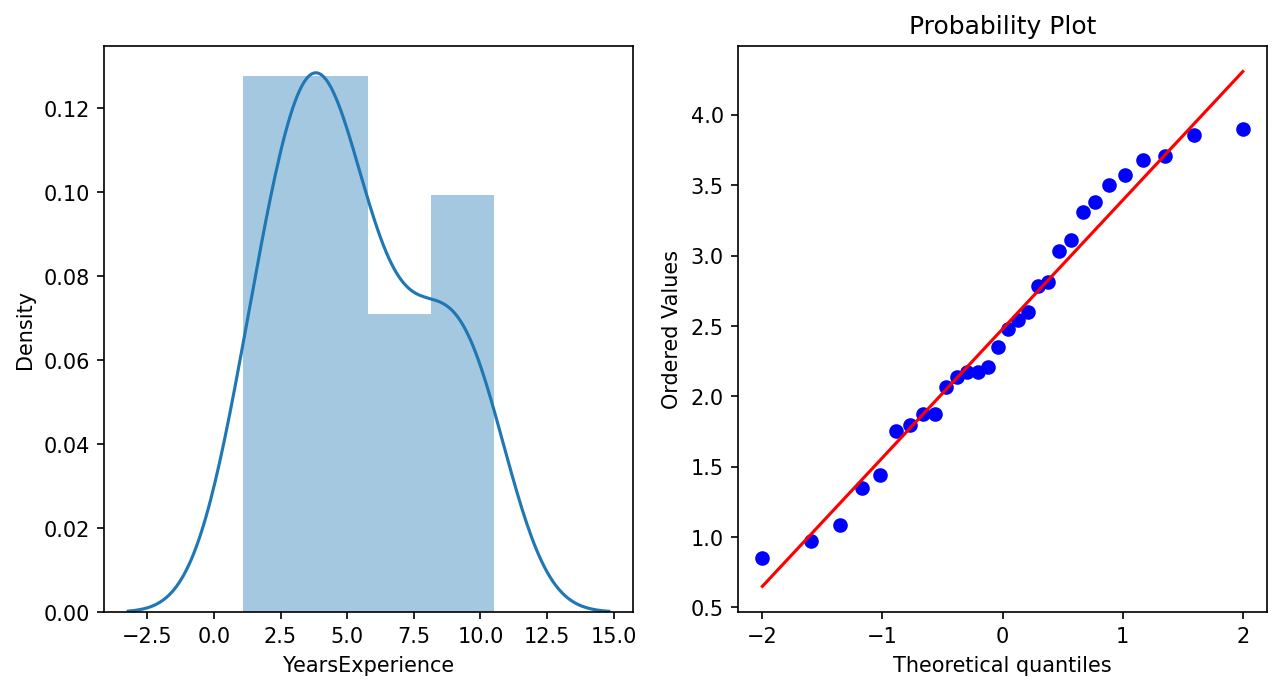

In [27]:
df['Boxcox_Yrs'], param = stats.boxcox(df['YearsExperience']+1)

print('Optimal lambda: ', param)

plots(df, 'Boxcox_Yrs')

In [28]:
boxcox_model = sm.OLS(y, df['Boxcox_Yrs']).fit()
box_predict = boxcox_model.predict(df['Boxcox_Yrs'])

In [29]:
boxcox_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              3661.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    4.48e-32
Time:                        14:33:17   Log-Likelihood:                         -308.81
No. Observations:                  30   AIC:                                      619.6
Df Residuals:                      29   BIC:                                      621.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Boxcox_Yrs  3.056e+04    505.086     60.508      0.000    2.95e+04    3.16e+04
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.403
Skew:                           0.136   Prob(JB):                        0.817
Kurtosis:                       2.501   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION**
- R-squared before trasnformation = 0.973
- LOG TRANSFORMATION R-squared = 0.985
- RECIPROCAL TRANSFORMATION R-squared = 0.37
- SQUARE ROOT TRANSFORMATION R-sqaured = 0.989
- EXPONENTIAL TRANSFORMATION R-squared = 0.947
- BOXCOX TRANSFORMATION R-sqaured = 0.992

**We can use Boxcox transformation as it is giving the best score of 0.992**